True 0.001


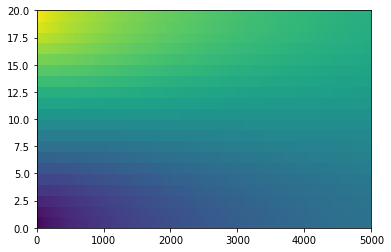

In [52]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from TDMAsolver import TDMAsolver


def diffusion(x, coef, dt, dx, nx):
    
    courant_number = coef * dt / dx
    assert courant_number < 1., courant_number
    cff = coef * dt / (dx * dx)
    
    a = -0.5 * cff * np.ones(nx-1)
    b = (1.0 + cff) * np.ones(nx)
    c = -0.5 * cff * np.ones(nx-1)
    
    b[0] = (1.0 + 0.5*cff)
    b[-1] = (1.0 + 0.5*cff)
    
    d = (1.0 - cff) * x
    d[0] = (1.0 - 0.5 * cff) * x[0]
    d[-1] = (1.0 - 0.5 * cff) * x[-1]
    d[1:] += 0.5 * cff * x[:-1]
    d[:-1] += 0.5 * cff * x[1:]
    
    return TDMAsolver(a, b, c, d)

nt = 5000
nx = 20
    
diff = 1e-3
dt = 0.1
dx = 0.1

print diff*dt/dx < 1., diff*dt/dx

x_his = np.zeros(shape=(nt+1,nx))
x_his[0] = np.arange(nx)

x = x_his[0].copy()

for t in range(nt):
    
    x = diffusion(x, diff, dt, dx, nx)
    
    x_his[t+1,:] = x
    
plt.pcolor(x_his.T)

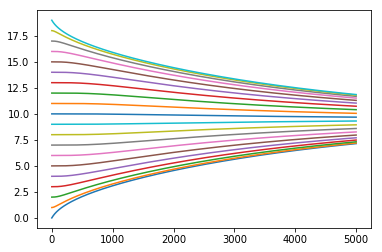

In [48]:
plt.plot(x_his)

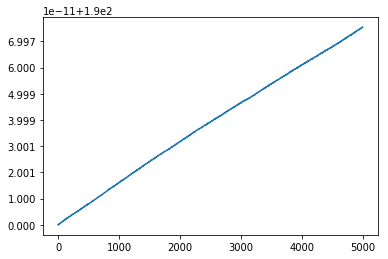

In [49]:
plt.plot(x_his.sum(axis=1))